In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

36.82893506666771 169.27004675619008
42.13959108363525 47.609767640019044
-38.46536138012338 135.1898274711906
10.559929761788425 47.36185691394624
-73.70990052009181 -104.72560814394842
1.3628499197854467 17.09405258711422
5.273359697555151 124.02220947453225
-27.99896414139355 -179.58775806267175
41.617217936214445 -102.16899429187569
43.09962811455043 4.961256531759517
-46.49100922134456 -78.3712943242391
29.195074250229766 -161.11594877139723
-73.75598160473322 -97.50540576485788
53.74008765514424 20.587203758477756
-9.616080345700624 -37.56935762989278
-33.16454695692913 53.44034796662433
40.78488111233435 -57.36388182215404
-68.9480002319275 77.5821408596832
57.58369460378648 91.09717840719276
10.538719859010058 166.19736847598523
-6.582887895586026 -105.23781841527341
-60.45943564408756 -0.350466571848699
43.970923047736136 -121.67688542599396
-27.7443462957956 0.1758955986244075
72.70558236685235 -29.1583452210119
55.362777284538936 -65.16671968252284
8.20014928647231 -5.516957

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)
    

780

In [7]:
import requests 

from config import weather_api_key

In [8]:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library

import time

from datetime import datetime

In [10]:
# Create an empty list to hold the weather data

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval       ")
print("-------------------------------")


# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in our list.

for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count. 
    
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the datge to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping ...")
        pass
    
# Indicate that Data Loading is complete

print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")
        


Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | urkarakh
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | bosaso
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | impfondo
Processing Record 7 of Set 1 | mabay
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | sterling
Processing Record 10 of Set 1 | port-de-bouc
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | olsztyn
Processing Record 14 of Set 1 | sao jose da tapera
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping ...
Processing Record 16 of Set 1 | louisbourg
City not found. Skipping ...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | rassvet
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | cape town
Proces

Processing Record 37 of Set 4 | bubaque
Processing Record 38 of Set 4 | kozulka
Processing Record 39 of Set 4 | bonthe
Processing Record 40 of Set 4 | bairiki
Processing Record 41 of Set 4 | broken hill
Processing Record 42 of Set 4 | byron bay
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | murgab
Processing Record 45 of Set 4 | hilo
Processing Record 46 of Set 4 | umzimvubu
City not found. Skipping ...
Processing Record 47 of Set 4 | otukpo
Processing Record 48 of Set 4 | rawson
Processing Record 49 of Set 4 | bluff
Processing Record 50 of Set 4 | yar-sale
Processing Record 1 of Set 5 | praya
Processing Record 2 of Set 5 | mackay
Processing Record 3 of Set 5 | lydenburg
Processing Record 4 of Set 5 | san ignacio
Processing Record 5 of Set 5 | lugovskiy
City not found. Skipping ...
Processing Record 6 of Set 5 | whitianga
Processing Record 7 of Set 5 | buala
Processing Record 8 of Set 5 | banda aceh
Processing Record 9 of Set 5 | narsaq
Processing Record 10 of Se

Processing Record 28 of Set 8 | jackson
Processing Record 29 of Set 8 | ilulissat
Processing Record 30 of Set 8 | wattegama
Processing Record 31 of Set 8 | denpasar
Processing Record 32 of Set 8 | marcona
City not found. Skipping ...
Processing Record 33 of Set 8 | faro
Processing Record 34 of Set 8 | winnemucca
Processing Record 35 of Set 8 | sychevka
Processing Record 36 of Set 8 | zhigalovo
Processing Record 37 of Set 8 | karratha
Processing Record 38 of Set 8 | jahrom
City not found. Skipping ...
Processing Record 39 of Set 8 | aksarayskiy
Processing Record 40 of Set 8 | alexandria
Processing Record 41 of Set 8 | thinadhoo
Processing Record 42 of Set 8 | kaitong
Processing Record 43 of Set 8 | lolua
City not found. Skipping ...
Processing Record 44 of Set 8 | walvis bay
Processing Record 45 of Set 8 | egvekinot
Processing Record 46 of Set 8 | pangoa
Processing Record 47 of Set 8 | artyk
City not found. Skipping ...
Processing Record 48 of Set 8 | inzai
Processing Record 49 of Set 8

Processing Record 15 of Set 12 | abu jubayhah
City not found. Skipping ...
Processing Record 16 of Set 12 | phuket
Processing Record 17 of Set 12 | kudahuvadhoo
Processing Record 18 of Set 12 | port keats
Processing Record 19 of Set 12 | padang
Processing Record 20 of Set 12 | coahuayana
Processing Record 21 of Set 12 | paka
Processing Record 22 of Set 12 | tudela
Processing Record 23 of Set 12 | gorontalo
Processing Record 24 of Set 12 | phan rang
City not found. Skipping ...
Processing Record 25 of Set 12 | norsup
Processing Record 26 of Set 12 | tay ninh
Processing Record 27 of Set 12 | boende
Processing Record 28 of Set 12 | manggar
Processing Record 29 of Set 12 | manutuke
Processing Record 30 of Set 12 | kytlym
City not found. Skipping ...
Processing Record 31 of Set 12 | baykit
Processing Record 32 of Set 12 | salvador
Processing Record 33 of Set 12 | boyuibe
Processing Record 34 of Set 12 | sakakah
Processing Record 35 of Set 12 | piterka
Processing Record 36 of Set 12 | katobu

Processing Record 1 of Set 16 | long beach
Processing Record 2 of Set 16 | iquique
Processing Record 3 of Set 16 | valparaiso
Processing Record 4 of Set 16 | chikoy
City not found. Skipping ...
Processing Record 5 of Set 16 | north creek
Processing Record 6 of Set 16 | kosino
Processing Record 7 of Set 16 | sur
Processing Record 8 of Set 16 | tarauaca
Processing Record 9 of Set 16 | tokur
Processing Record 10 of Set 16 | rio grande
Processing Record 11 of Set 16 | chaplygin
Processing Record 12 of Set 16 | los altos
Processing Record 13 of Set 16 | hudson bay
Processing Record 14 of Set 16 | sorkjosen
Processing Record 15 of Set 16 | tupik
Processing Record 16 of Set 16 | russell
Processing Record 17 of Set 16 | matara
Processing Record 18 of Set 16 | nabire
Processing Record 19 of Set 16 | brandenburg
Processing Record 20 of Set 16 | oktyabrskoye
Processing Record 21 of Set 16 | santa eulalia del rio
City not found. Skipping ...
Processing Record 22 of Set 16 | linjiang
Processing Rec

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,46.80,96,100,4.83,RU,2022-09-29 18:46:37
1,Urkarakh,42.1630,47.6307,54.14,83,0,3.29,RU,2022-09-29 18:46:38
2,Port Lincoln,-34.7333,135.8667,52.12,86,100,10.92,AU,2022-09-29 18:46:38
3,Bosaso,11.2842,49.1816,85.95,67,5,2.30,SO,2022-09-29 18:46:39
4,Punta Arenas,-53.1500,-70.9167,55.51,44,40,23.02,CL,2022-09-29 18:46:40


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2022-09-29 18:46:37,59.7035,30.7861,46.80,96,100,4.83
1,Urkarakh,RU,2022-09-29 18:46:38,42.1630,47.6307,54.14,83,0,3.29
2,Port Lincoln,AU,2022-09-29 18:46:38,-34.7333,135.8667,52.12,86,100,10.92
3,Bosaso,SO,2022-09-29 18:46:39,11.2842,49.1816,85.95,67,5,2.30
4,Punta Arenas,CL,2022-09-29 18:46:40,-53.1500,-70.9167,55.51,44,40,23.02


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting 

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


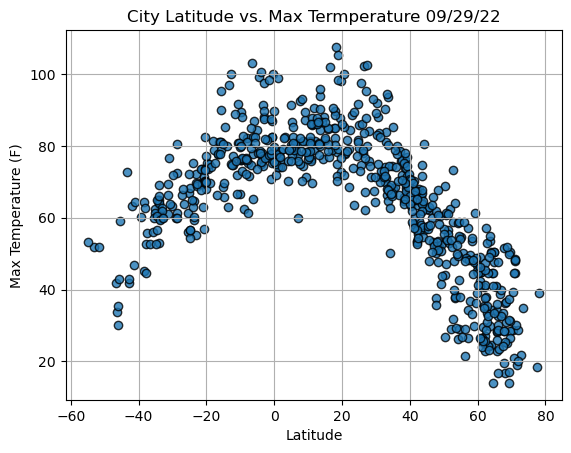

In [16]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Max Termperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig1.png")

# Show plot

plt.show()


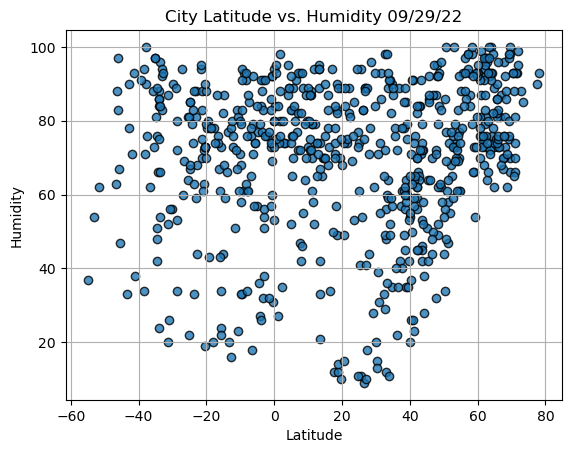

In [19]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig2.png")

# Show plot

plt.show()



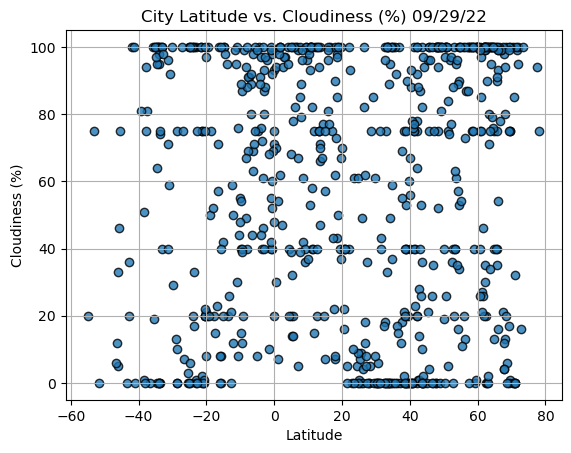

In [22]:
# Build the scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig3.png")

# Show plot

plt.show()



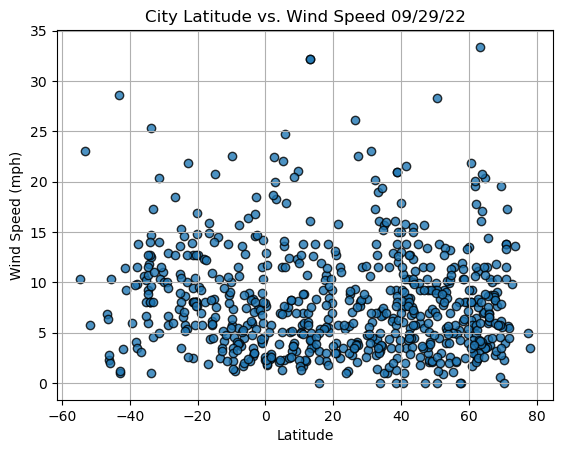

In [23]:
# Build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties. 

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("weather_data/Fig4.png")

# Show plot

plt.show()


In [14]:
# Import linregress

from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data. 

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate teh regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    
    
    
    

In [18]:
index13 = city_data_df.loc[13]
index13

City           Sao Jose Da Tapera
Country                        BR
Date          2022-09-29 18:46:47
Lat                       -9.5583
Lng                      -37.3811
Max Temp                    85.93
Humidity                       36
Cloudiness                     46
Wind Speed                  13.35
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

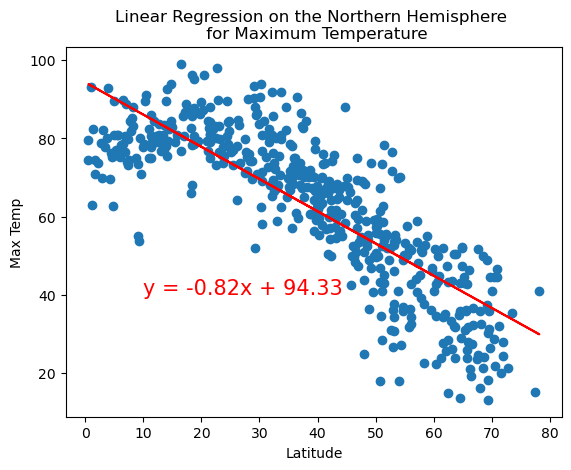

In [22]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Max Temp",(10,40))

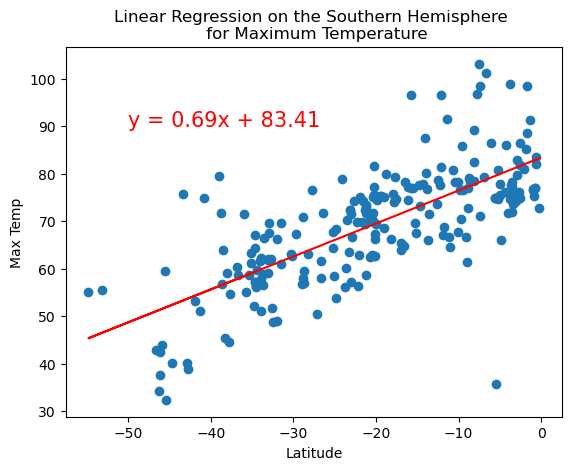

In [23]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       "Max Temp",(-50,90))

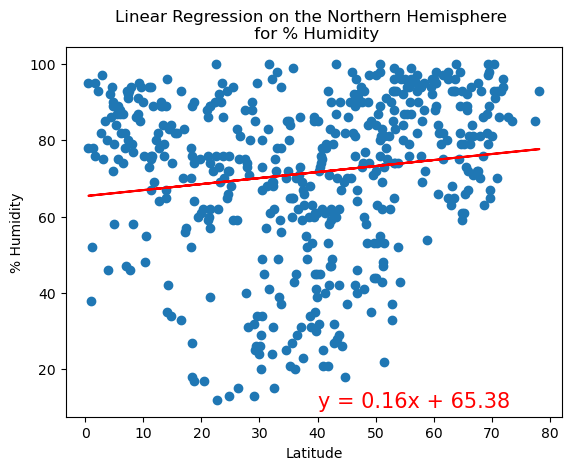

In [24]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity", (40,10))

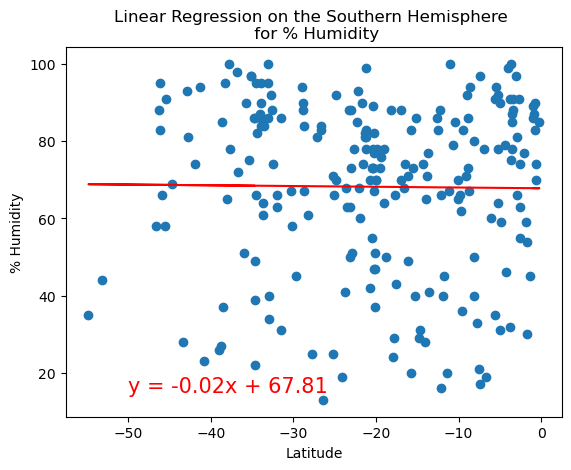

In [25]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity", (-50,15))

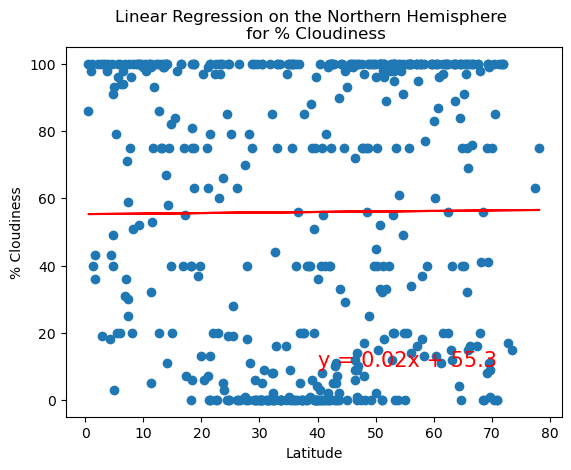

In [26]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness", (40,10))

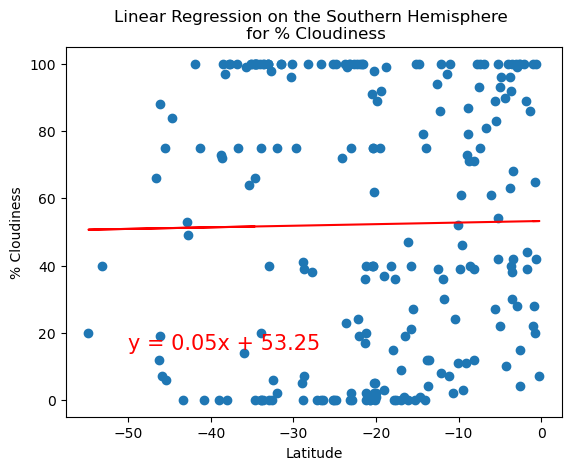

In [27]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness", (-50,15))

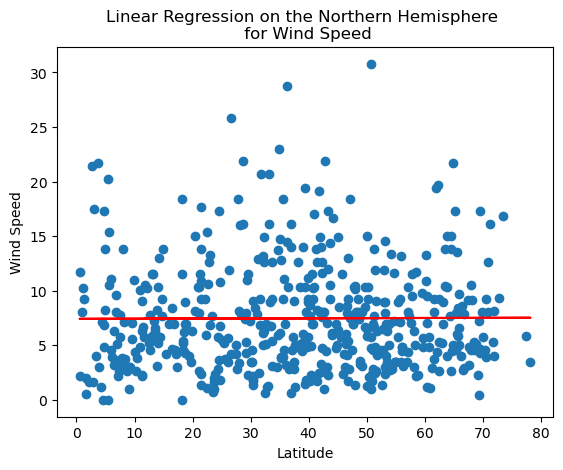

In [28]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed", (40,35))

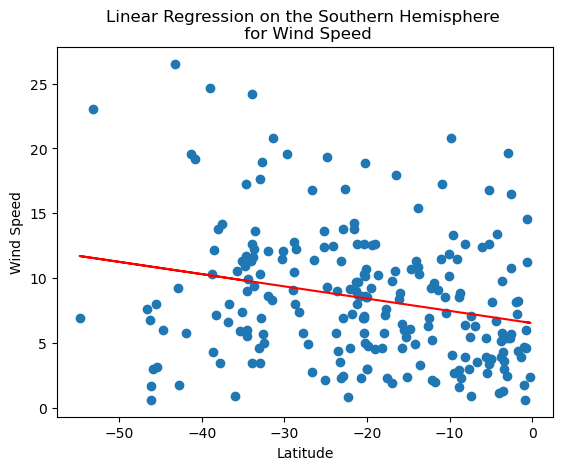

In [29]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function

plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Wind Speed", (-50,35))